# Machine Learning Pset 2 Qn 1

## Mong Chang Hsi
## 1003085

In [317]:
# import relevant libraries

from csv import reader
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [318]:
# loading file function

def load_file(filename):
    dataset = []
    with open(filename, 'r') as file:
        file_reader = reader(file)
        for row in file_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [319]:
# Loading Dataset

filename = 'hw2-image.txt'
dataset = load_file(filename)

for row in range(len(dataset)):
    dataset[row][0] = dataset[row][0].split(" ")

for row in range(len(dataset)):
    for i in range(len(dataset[row][0])):
        dataset[row][0][i] = int(dataset[row][0][i])

for row in range(len(dataset)):
    dataset[row] = dataset[row][0]

In [320]:
# initializing clusters
cluster_name = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8']
cluster_dict= {
    'c1':[255, 255, 255],
    'c2':[255, 0, 0],
    'c3':[128, 0, 0],
    'c4':[0, 255, 0],
    'c5':[0, 128, 0],
    'c6':[0, 0, 255],
    'c7':[0, 0, 128],
    'c8':[0, 0, 0]
}

# euclidean_dist function
def euclidean_dist(dataset, cc):

    accum_dist = []
    
    for row in range(len(dataset)):
        distance = math.sqrt( (dataset[row][0] - cc[0])**2 + (dataset[row][1] - cc[1])**2 + (dataset[row][2] - cc[2])**2 )
        accum_dist.append(distance)
    return accum_dist


In [321]:
# table of all the euclidean_dist

def summarize(dataset, cluster_dict):
    table_dist = []
    for i in range(len(cluster_name)):
        table_dist.append(euclidean_dist(dataset, cluster_dict[cluster_name[i]]))
    return table_dist


In [322]:
# comparing distances for each datapoints

def comparison(summarize):
    for_all_index = []
    for j in range(len(summarize[0])):
        all_dist = []
        for i in range(len(summarize)):
            all_dist.append(summarize[i][j])
        minimum_dist = min(all_dist)
        minimum_dist_index = all_dist.index(minimum_dist)
        for_all_index.append(minimum_dist_index)
    return for_all_index
#table = comparison(summarize(dataset, cluster_dict))

In [323]:
# calculating new cluster center

# counter = {'c1':0, 'c2':0, 'c3':0, 'c4':0, 'c5':0, 'c6':0, 'c7':0, 'c8':0}

# for i in table:
#     counter[cluster_name[i]] += 1
#{'c1': 7841, 'c2': 8037, 'c3': 109941, 'c4': 0, 'c5': 176, 'c6': 0, 'c7': 895, 'c8': 83122}

def newcentroid(dataset, table):
    min_dist_cluster = {
    'c1':[], 'c2':[], 'c3':[], 'c4':[], 'c5':[], 'c6':[], 'c7':[], 'c8':[]}

    for i in range(len(table)):
        min_dist_cluster[cluster_name[table[i]]].append(dataset[i])
    
    for i in min_dist_cluster:
        sum_r = 0
        sum_g = 0
        sum_b = 0
        for j in min_dist_cluster[i]:
            sum_r += j[0]
            sum_g += j[1]
            sum_b += j[2]
        if len(min_dist_cluster[i]) != 0:
            new_centroid_r = sum_r / len(min_dist_cluster[i])
            new_centroid_g = sum_g / len(min_dist_cluster[i])
            new_centroid_b = sum_b / len(min_dist_cluster[i])
        else:
            continue
        
        new_centroid = [new_centroid_r, new_centroid_g, new_centroid_b]
        cluster_dict[i] = new_centroid
        
    return cluster_dict

# newcentroid(dataset, table)
# print(cluster_dict)

In [324]:
def kmean(dataset, cluster_dict):
    counter_num = 0
    history_centroid = []
    whole_comparison_table = []
    while True:
        counter = {'c1':0, 'c2':0, 'c3':0, 'c4':0, 'c5':0, 'c6':0, 'c7':0, 'c8':0}

        table = comparison(summarize(dataset, cluster_dict))

        for i in table:
            counter[cluster_name[i]] += 1

        if len(whole_comparison_table) != 0:
            if whole_comparison_table[len(whole_comparison_table) -1] == table:
                break
            else:
                counter_num += 1
                whole_comparison_table.append(table)
                cluster_dict = newcentroid(dataset, table)
        else:
            counter_num += 1
            whole_comparison_table.append(table)
            cluster_dict = newcentroid(dataset, table)
        storage = cluster_dict.copy()
        history_centroid.append(storage)
    return counter, cluster_dict, counter_num, history_centroid

total_cluster_count, final_cluster_pos, counter_num, history_centroid = kmean(dataset, cluster_dict)
print("Each of the cluster has the following number of pixels", total_cluster_count)
print("The final cluster coordinates are:", final_cluster_pos)
print("The algorithm has ran", counter_num, "times")
print(history_centroid)

Each of the cluster has the following number of pixels {'c1': 4930, 'c2': 15190, 'c3': 52535, 'c4': 0, 'c5': 22075, 'c6': 0, 'c7': 40365, 'c8': 74917}
The final cluster coordinates are: {'c1': [241.22961460446248, 238.62515212981745, 233.86288032454362], 'c2': [194.41158657011192, 136.33311389071758, 90.94364713627387], 'c3': [136.2655562958028, 61.08973065575331, 10.103854573141716], 'c4': [0, 255, 0], 'c5': [157.2917327293318, 97.59397508493771, 51.43329558323896], 'c6': [0, 0, 255], 'c7': [78.9274371361328, 37.10828688219993, 13.070704818530906], 'c8': [25.978002322570312, 23.235754234686386, 23.605990629630124]}
The algorithm has ran 47 times
[{'c1': [226.2480550950134, 208.85269736003062, 194.33031501084045], 'c2': [203.59562025631453, 135.4883663058355, 77.50304840114471], 'c3': [127.34619477719868, 64.41179359838459, 21.98618349842188], 'c4': [0, 255, 0], 'c5': [92.93181818181819, 94.45454545454545, 89.30113636363636], 'c6': [0, 0, 255], 'c7': [56.16536312849162, 56.912849162011

In [325]:
# part a
def cluster_counter(total_cluster_count):
    counter = 0
    for i in total_cluster_count:
        if total_cluster_count[i] != 0:
            counter += 1
    return counter

# part b
def cluster_pos(final_cluster_pos, total_cluster_count):
    for i in final_cluster_pos:
        if total_cluster_count[i] != 0:
            print("The final position of cluster", i, "is", final_cluster_pos[i])
# part c
def cluster_count(total_cluster_count):
    for i in total_cluster_count:
        print('The number of pixels for', i, 'is', total_cluster_count[i])

# part d
x_axis = list(range(1, counter_num+1))
def dist_calculator(dataset, cluster_pos):
    table = comparison(summarize(dataset, cluster_pos))
    sum_dist = 0
    for i in range(len(table)):
        dist = (dataset[i][0] - cluster_pos[cluster_name[table[i]]][0])**2 + (dataset[i][1] - cluster_pos[cluster_name[table[i]]][1])**2 + (dataset[i][2] - cluster_pos[cluster_name[table[i]]][2])**2 
        sum_dist += dist
    return sum_dist

def y_axis_calculator(dataset, history_centroid):
    y_axis = []
    for i in history_centroid:
        y_axis.append(dist_calculator(dataset, i))
    return y_axis
y_axis = y_axis_calculator(dataset, history_centroid)

Part A: the remaining number of cluster is 6
 
Part B: 
The final position of cluster c1 is [241.22961460446248, 238.62515212981745, 233.86288032454362]
The final position of cluster c2 is [194.41158657011192, 136.33311389071758, 90.94364713627387]
The final position of cluster c3 is [136.2655562958028, 61.08973065575331, 10.103854573141716]
The final position of cluster c5 is [157.2917327293318, 97.59397508493771, 51.43329558323896]
The final position of cluster c7 is [78.9274371361328, 37.10828688219993, 13.070704818530906]
The final position of cluster c8 is [25.978002322570312, 23.235754234686386, 23.605990629630124]
 
Part C: 
The number of pixels for c1 is 4930
The number of pixels for c2 is 15190
The number of pixels for c3 is 52535
The number of pixels for c4 is 0
The number of pixels for c5 is 22075
The number of pixels for c6 is 0
The number of pixels for c7 is 40365
The number of pixels for c8 is 74917
 
Part D: 
[210294736.576248, 174481268.85329866, 165262491.15658823, 143

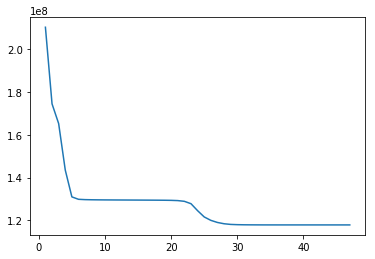

In [326]:
print("Part A: the remaining number of cluster is", cluster_counter(total_cluster_count))
print(" ")
print("Part B: ")
cluster_pos(final_cluster_pos, total_cluster_count)
print(" ")
print("Part C: ")
cluster_count(total_cluster_count)
print(" ")
print("Part D: ")
print(y_axis)
plt.plot(x_axis, y_axis)
plt.show()

In [327]:
# Sample Answer if run correctly
# Part A: the remaining number of cluster is 6
 
# Part B: 
# The final position of cluster c1 is [241.22961460446248, 238.62515212981745, 233.86288032454362]
# The final position of cluster c2 is [194.41158657011192, 136.33311389071758, 90.94364713627387]
# The final position of cluster c3 is [136.2655562958028, 61.08973065575331, 10.103854573141716]
# The final position of cluster c5 is [157.2917327293318, 97.59397508493771, 51.43329558323896]
# The final position of cluster c7 is [78.9274371361328, 37.10828688219993, 13.070704818530906]
# The final position of cluster c8 is [25.978002322570312, 23.235754234686386, 23.605990629630124]
 
# Part C: 
# The number of pixels for c1 is 4930
# The number of pixels for c2 is 15190
# The number of pixels for c3 is 52535
# The number of pixels for c4 is 0
# The number of pixels for c5 is 22075
# The number of pixels for c6 is 0
# The number of pixels for c7 is 40365
# The number of pixels for c8 is 74917

## Drawing Obama's Face

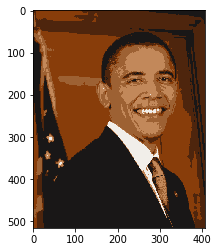

In [330]:
def float_to_int(final_cluster_pos):
    for i in final_cluster_pos:
        for j in range(len(final_cluster_pos[i])):
            final_cluster_pos[i][j] = int(final_cluster_pos[i][j])
    return final_cluster_pos

def matrix(final_cluster_pos, table):
    main_list = []
    a = 0
    while a < 516:
        b = 0
        nested_list = []
        while b < 407:
            nested_list.append(final_cluster_pos[cluster_name[table[b]]])
            b += 1
        del table[:407]
        main_list.append(nested_list)
        a += 1
    return main_list

float_to_int(final_cluster_pos)
obama_table = comparison(summarize(dataset, final_cluster_pos))
main_list = matrix(final_cluster_pos, obama_table)
imgplot = plt.imshow(main_list)